In [110]:
import networkx as nx
import math

In [111]:
G1, G2 = nx.Graph(), nx.Graph()

G2.add_edges_from([
    (1,2),
    (2,4),
    (2,3),
    (3,5),
    (4,5),
    (5,6)
])

G1.add_edges_from([
    (1, 2),
    (2, 3),
    (2, 4),
    (3, 4),
    (3, 6),
    (4, 5),
])

{1: [1], 2: [1, 2], 3: [1, 2, 3], 4: [1, 2, 4], 6: [1, 2, 3, 6], 5: [1, 2, 4, 5]}


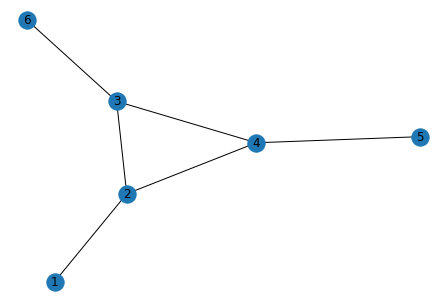

In [149]:
nx.draw(G1,with_labels=True)
#nx.draw(G2,with_labels=True)
paths1=nx.single_source_shortest_path(G1,1)
paths2=nx.single_source_shortest_path(G2,1)

print(paths1)

In [150]:
distancesG1 = {}
distancesG2 = {}
mesuresG1 = []
mesuresG2 = []

#  Uses distance as key and a list of nodes with that distance as values.
def GetShortestPaths(paths):
    distances = {}
    l = 0
    for path in paths:
        edgeDistance = len(paths[path])-1
        distances.setdefault(edgeDistance, []).append(l+1) 
        l=l+1
    
    return distances
 

""" Uses node IDs as keys and distance from root as values
def GetShortestPaths(paths):
    distances = {}
    l = 1
    for path in paths:
        edgeDistance = len(paths[path])-1
        distances[l] = edgeDistance
        l=l+1
    
    return distances
"""

distancesG1 = GetShortestPaths(paths1)
distancesG2 = GetShortestPaths(paths2)

#def GetMesures():
    #prob use some log function to assign values to nodes
    #Coming in future should return list of ints

mesuresG1 = [1, 1, 2, 2, 1, 1]
mesuresG2 = [1, 1, 2, 2, 1, 1]

def FindUnion(set1, set2):
    union = set(set1.keys()).union(set(set2.keys()))
    return list(union)

distanceG1G2 = FindUnion(distancesG1, distancesG2)

cRDG1 = {} #CRD - Cumulative Radial Distribution
cRDG2 = {}

def getM(radius, dic):
    if radius not in dic:
        return getM(radius-1, dic)
    
    newM = 0
    for i in range(radius+1):
        holder = len(dic[i])
        for j in range(holder):
            newM = newM + mesuresG1[dic[i][j]-1]
    
    return(newM)


for r in distanceG1G2:
    cRDG1[r] = getM(r, distancesG1)
    cRDG2[r] = getM(r, distancesG2)

rDD = 0# Radial Distribution Distance
for r in distanceG1G2:
    rDD = rDD + math.exp(-r)*abs(cRDG1[r]-cRDG2[r])

print(distancesG1)
print(distancesG2)
print(cRDG1)
print(cRDG2)
print ("The Radial Distribution Distance is {0}".format(rDD))
    

{0: [1], 1: [2], 2: [3, 4], 3: [5, 6]}
{0: [1], 1: [2], 2: [3, 4], 3: [5], 4: [6]}
{0: 1, 1: 2, 2: 6, 3: 8, 4: 8}
{0: 1, 1: 2, 2: 6, 3: 7, 4: 8}
The Radial Distribution Distance is 0.049787068367863944
